# JPY Prediction

### Download market data 
Cover 10-years Daily data January 1, 2011 to Sep 30, 2021

In [213]:
pip install pandas_datareader

In [214]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
from scipy.stats import ranksums
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [215]:
import pandas_datareader as pdr
tickers = ['HYG', 'JNK', 'LQD', 'VCIT', 'SPY', 'TMUS', 'CCO', 'THC', 'USD', 'CME', 'CIU', 'EMB', 'AGZ', 'CLY', 'IEI']
df = pdr.DataReader(tickers, data_source='yahoo', start='2011-01-01', end='2021-09-30')

### Analysing Adjusted Close values

In [216]:
df=df['Adj Close'].reset_index()

In [217]:
df.head()

Symbols,Date,HYG,JNK,LQD,VCIT,SPY,TMUS,CCO,THC,USD,CME,CIU,EMB,AGZ,CLY,IEI
0,2010-12-31,49.528507,62.421772,75.077377,54.771770,102.055611,20.929106,3.733771,26.760000,1.567809,41.492554,105.180000,65.348495,92.395950,52.980000,99.218727
1,2011-01-03,49.566895,62.673317,75.368164,54.736950,103.110649,21.658226,3.901311,27.200001,1.579227,40.807770,105.290001,65.623146,92.412842,52.980000,99.270645
2,2011-01-04,49.791817,62.861923,75.465073,54.910969,103.053848,23.066757,3.935884,27.360001,1.589858,40.878700,105.290001,66.025932,92.370651,52.669998,99.331230
3,2011-01-05,49.917953,63.160622,74.911232,54.472431,103.589455,23.630169,3.922587,27.440001,1.596550,40.152660,104.760002,65.647522,92.066956,52.029999,98.777390
4,2011-01-06,49.978313,63.192039,75.021988,54.646439,103.386566,22.039358,3.895992,27.480000,1.625687,40.446693,104.959999,65.140999,92.125977,52.480000,98.993706


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706 entries, 0 to 2705
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2706 non-null   datetime64[ns]
 1   HYG     2706 non-null   float64       
 2   JNK     2706 non-null   float64       
 3   LQD     2706 non-null   float64       
 4   VCIT    2706 non-null   float64       
 5   SPY     2706 non-null   float64       
 6   TMUS    2706 non-null   float64       
 7   CCO     2706 non-null   float64       
 8   THC     2706 non-null   float64       
 9   USD     2706 non-null   float64       
 10  CME     2706 non-null   float64       
 11  CIU     1908 non-null   float64       
 12  EMB     2706 non-null   float64       
 13  AGZ     2706 non-null   float64       
 14  CLY     1930 non-null   float64       
 15  IEI     2706 non-null   float64       
dtypes: datetime64[ns](1), float64(15)
memory usage: 338.4 KB


### Impute NaN with interpolation

In [219]:
df1 = df.interpolate(method='linear', axis=0)
df1.head()

Symbols,Date,HYG,JNK,LQD,VCIT,SPY,TMUS,CCO,THC,USD,CME,CIU,EMB,AGZ,CLY,IEI
0,2010-12-31,49.528507,62.421772,75.077377,54.771770,102.055611,20.929106,3.733771,26.760000,1.567809,41.492554,105.180000,65.348495,92.395950,52.980000,99.218727
1,2011-01-03,49.566895,62.673317,75.368164,54.736950,103.110649,21.658226,3.901311,27.200001,1.579227,40.807770,105.290001,65.623146,92.412842,52.980000,99.270645
2,2011-01-04,49.791817,62.861923,75.465073,54.910969,103.053848,23.066757,3.935884,27.360001,1.589858,40.878700,105.290001,66.025932,92.370651,52.669998,99.331230
3,2011-01-05,49.917953,63.160622,74.911232,54.472431,103.589455,23.630169,3.922587,27.440001,1.596550,40.152660,104.760002,65.647522,92.066956,52.029999,98.777390
4,2011-01-06,49.978313,63.192039,75.021988,54.646439,103.386566,22.039358,3.895992,27.480000,1.625687,40.446693,104.959999,65.140999,92.125977,52.480000,98.993706


In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706 entries, 0 to 2705
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2706 non-null   datetime64[ns]
 1   HYG     2706 non-null   float64       
 2   JNK     2706 non-null   float64       
 3   LQD     2706 non-null   float64       
 4   VCIT    2706 non-null   float64       
 5   SPY     2706 non-null   float64       
 6   TMUS    2706 non-null   float64       
 7   CCO     2706 non-null   float64       
 8   THC     2706 non-null   float64       
 9   USD     2706 non-null   float64       
 10  CME     2706 non-null   float64       
 11  CIU     2706 non-null   float64       
 12  EMB     2706 non-null   float64       
 13  AGZ     2706 non-null   float64       
 14  CLY     2706 non-null   float64       
 15  IEI     2706 non-null   float64       
dtypes: datetime64[ns](1), float64(15)
memory usage: 338.4 KB


In [221]:
exchange_rate_tickers = ['EUR=X', 'JPY=X', 'CHF=X', 'GBP=X']
dfe = pdr.DataReader(exchange_rate_tickers , data_source='yahoo', start='2011-01-01', end='2021-09-30')
dfe=dfe['Adj Close'].reset_index()


In [222]:
dfe.head()

Symbols,Date,EUR=X,JPY=X,CHF=X,GBP=X
0,2010-12-31,0.75181,81.480003,0.93450,0.64779
1,2011-01-03,0.74862,81.123001,0.93200,0.64216
2,2011-01-04,0.74868,81.669998,0.93424,0.64559
3,2011-01-05,0.75069,82.038002,0.94720,0.64111
4,2011-01-06,0.76006,83.189003,0.96581,0.64466


In [223]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2801 non-null   datetime64[ns]
 1   EUR=X   2800 non-null   float64       
 2   JPY=X   2800 non-null   float64       
 3   CHF=X   2797 non-null   float64       
 4   GBP=X   2800 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 109.5 KB


### Impute NaN with interpolation

In [224]:
dfe1 = dfe.interpolate(method='linear', axis=0)
dfe1.head()

Symbols,Date,EUR=X,JPY=X,CHF=X,GBP=X
0,2010-12-31,0.75181,81.480003,0.93450,0.64779
1,2011-01-03,0.74862,81.123001,0.93200,0.64216
2,2011-01-04,0.74868,81.669998,0.93424,0.64559
3,2011-01-05,0.75069,82.038002,0.94720,0.64111
4,2011-01-06,0.76006,83.189003,0.96581,0.64466


In [225]:
dfe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2801 non-null   datetime64[ns]
 1   EUR=X   2801 non-null   float64       
 2   JPY=X   2801 non-null   float64       
 3   CHF=X   2801 non-null   float64       
 4   GBP=X   2801 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 109.5 KB


### Merging 2 datasets

In [226]:
ac=pd.merge(df1, dfe1, on="Date", how='outer')
ac.shape

(3125, 20)

### Sorting by date

In [227]:
ac=ac.sort_values(by='Date')
ac.head()

Symbols,Date,HYG,JNK,LQD,VCIT,SPY,TMUS,CCO,THC,USD,CME,CIU,EMB,AGZ,CLY,IEI,EUR=X,JPY=X,CHF=X,GBP=X
0,2010-12-31,49.528507,62.421772,75.077377,54.771770,102.055611,20.929106,3.733771,26.760000,1.567809,41.492554,105.180000,65.348495,92.395950,52.980000,99.218727,0.75181,81.480003,0.93450,0.64779
1,2011-01-03,49.566895,62.673317,75.368164,54.736950,103.110649,21.658226,3.901311,27.200001,1.579227,40.807770,105.290001,65.623146,92.412842,52.980000,99.270645,0.74862,81.123001,0.93200,0.64216
2,2011-01-04,49.791817,62.861923,75.465073,54.910969,103.053848,23.066757,3.935884,27.360001,1.589858,40.878700,105.290001,66.025932,92.370651,52.669998,99.331230,0.74868,81.669998,0.93424,0.64559
3,2011-01-05,49.917953,63.160622,74.911232,54.472431,103.589455,23.630169,3.922587,27.440001,1.596550,40.152660,104.760002,65.647522,92.066956,52.029999,98.777390,0.75069,82.038002,0.94720,0.64111
4,2011-01-06,49.978313,63.192039,75.021988,54.646439,103.386566,22.039358,3.895992,27.480000,1.625687,40.446693,104.959999,65.140999,92.125977,52.480000,98.993706,0.76006,83.189003,0.96581,0.64466


In [228]:
ac=ac.reset_index().drop(columns='index')
ac.head()

Symbols,Date,HYG,JNK,LQD,VCIT,SPY,TMUS,CCO,THC,USD,CME,CIU,EMB,AGZ,CLY,IEI,EUR=X,JPY=X,CHF=X,GBP=X
0,2010-12-31,49.528507,62.421772,75.077377,54.771770,102.055611,20.929106,3.733771,26.760000,1.567809,41.492554,105.180000,65.348495,92.395950,52.980000,99.218727,0.75181,81.480003,0.93450,0.64779
1,2011-01-03,49.566895,62.673317,75.368164,54.736950,103.110649,21.658226,3.901311,27.200001,1.579227,40.807770,105.290001,65.623146,92.412842,52.980000,99.270645,0.74862,81.123001,0.93200,0.64216
2,2011-01-04,49.791817,62.861923,75.465073,54.910969,103.053848,23.066757,3.935884,27.360001,1.589858,40.878700,105.290001,66.025932,92.370651,52.669998,99.331230,0.74868,81.669998,0.93424,0.64559
3,2011-01-05,49.917953,63.160622,74.911232,54.472431,103.589455,23.630169,3.922587,27.440001,1.596550,40.152660,104.760002,65.647522,92.066956,52.029999,98.777390,0.75069,82.038002,0.94720,0.64111
4,2011-01-06,49.978313,63.192039,75.021988,54.646439,103.386566,22.039358,3.895992,27.480000,1.625687,40.446693,104.959999,65.140999,92.125977,52.480000,98.993706,0.76006,83.189003,0.96581,0.64466


In [229]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3125 non-null   datetime64[ns]
 1   HYG     2706 non-null   float64       
 2   JNK     2706 non-null   float64       
 3   LQD     2706 non-null   float64       
 4   VCIT    2706 non-null   float64       
 5   SPY     2706 non-null   float64       
 6   TMUS    2706 non-null   float64       
 7   CCO     2706 non-null   float64       
 8   THC     2706 non-null   float64       
 9   USD     2706 non-null   float64       
 10  CME     2706 non-null   float64       
 11  CIU     2706 non-null   float64       
 12  EMB     2706 non-null   float64       
 13  AGZ     2706 non-null   float64       
 14  CLY     2706 non-null   float64       
 15  IEI     2706 non-null   float64       
 16  EUR=X   2801 non-null   float64       
 17  JPY=X   2801 non-null   float64       
 18  CHF=X   

In [230]:
p= ac[ac.isna().any(axis=1)]
p.head()

Symbols,Date,HYG,JNK,LQD,VCIT,SPY,TMUS,CCO,THC,USD,CME,CIU,EMB,AGZ,CLY,IEI,EUR=X,JPY=X,CHF=X,GBP=X
11,2011-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74737,82.887001,0.96370,0.62967
36,2011-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.72921,83.080002,0.94390,0.61535
61,2011-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.71296,81.448997,0.92190,0.62484
66,2011-04-01,51.028717,64.406067,75.86248,55.62151,108.530663,27.325489,3.856102,30.52,1.608796,39.419971,105.32,65.759491,92.574768,52.48,99.214111,NaN,NaN,NaN,NaN
67,2011-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70307,84.220001,0.92539,0.62032


### Impute NaN with interpolation

In [231]:
ac1 = ac.interpolate(method='linear', axis=0)
ac1.head()

Symbols,Date,HYG,JNK,LQD,VCIT,SPY,TMUS,CCO,THC,USD,CME,CIU,EMB,AGZ,CLY,IEI,EUR=X,JPY=X,CHF=X,GBP=X
0,2010-12-31,49.528507,62.421772,75.077377,54.771770,102.055611,20.929106,3.733771,26.760000,1.567809,41.492554,105.180000,65.348495,92.395950,52.980000,99.218727,0.75181,81.480003,0.93450,0.64779
1,2011-01-03,49.566895,62.673317,75.368164,54.736950,103.110649,21.658226,3.901311,27.200001,1.579227,40.807770,105.290001,65.623146,92.412842,52.980000,99.270645,0.74862,81.123001,0.93200,0.64216
2,2011-01-04,49.791817,62.861923,75.465073,54.910969,103.053848,23.066757,3.935884,27.360001,1.589858,40.878700,105.290001,66.025932,92.370651,52.669998,99.331230,0.74868,81.669998,0.93424,0.64559
3,2011-01-05,49.917953,63.160622,74.911232,54.472431,103.589455,23.630169,3.922587,27.440001,1.596550,40.152660,104.760002,65.647522,92.066956,52.029999,98.777390,0.75069,82.038002,0.94720,0.64111
4,2011-01-06,49.978313,63.192039,75.021988,54.646439,103.386566,22.039358,3.895992,27.480000,1.625687,40.446693,104.959999,65.140999,92.125977,52.480000,98.993706,0.76006,83.189003,0.96581,0.64466


In [232]:
ac1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3125 non-null   datetime64[ns]
 1   HYG     3125 non-null   float64       
 2   JNK     3125 non-null   float64       
 3   LQD     3125 non-null   float64       
 4   VCIT    3125 non-null   float64       
 5   SPY     3125 non-null   float64       
 6   TMUS    3125 non-null   float64       
 7   CCO     3125 non-null   float64       
 8   THC     3125 non-null   float64       
 9   USD     3125 non-null   float64       
 10  CME     3125 non-null   float64       
 11  CIU     3125 non-null   float64       
 12  EMB     3125 non-null   float64       
 13  AGZ     3125 non-null   float64       
 14  CLY     3125 non-null   float64       
 15  IEI     3125 non-null   float64       
 16  EUR=X   3125 non-null   float64       
 17  JPY=X   3125 non-null   float64       
 18  CHF=X   

In [431]:
ac1.to_csv(path_or_buf='D:/Mini Project/Market Prediction/Adjcloseimp.csv')

# Find the correlation between target variable "JPY=X" and other features

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

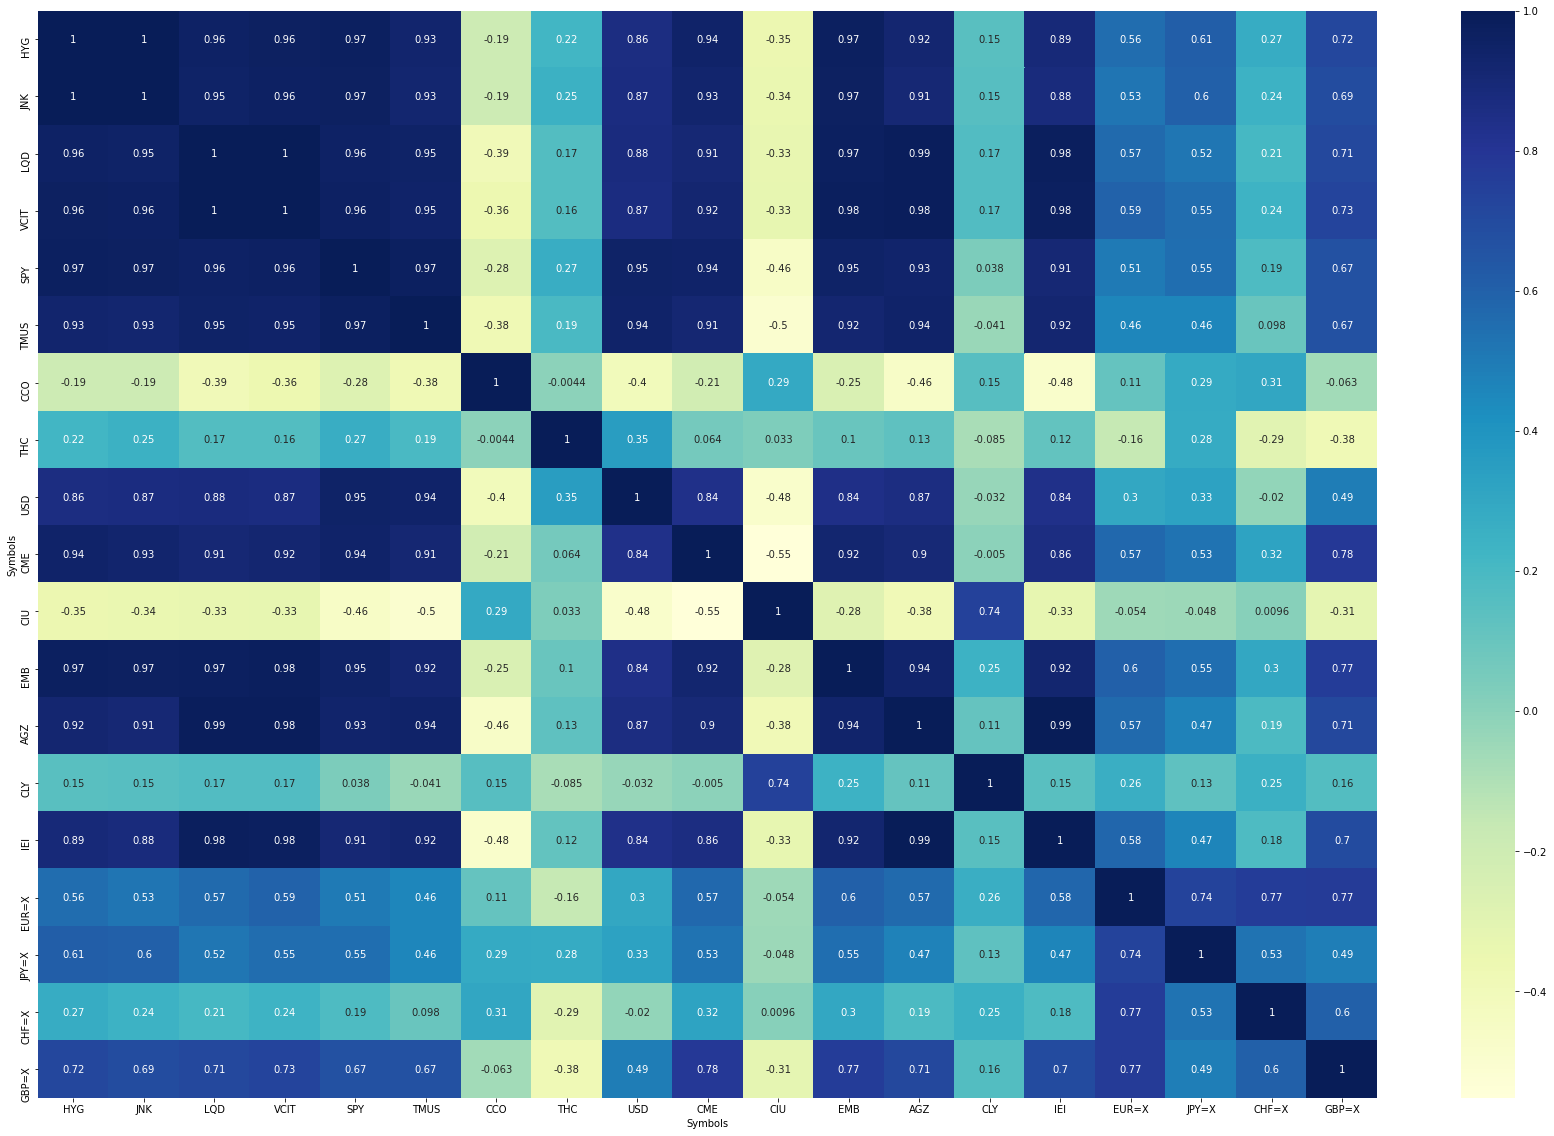

In [234]:
correl = ac1.corr()
fig,ax=plt.subplots(figsize=(30,20))
sns.heatmap(correl,annot=True,ax=ax,cmap="YlGnBu")

In [235]:
ac1.columns

Index(['Date', 'HYG', 'JNK', 'LQD', 'VCIT', 'SPY', 'TMUS', 'CCO', 'THC', 'USD',
       'CME', 'CIU', 'EMB', 'AGZ', 'CLY', 'IEI', 'EUR=X', 'JPY=X', 'CHF=X',
       'GBP=X'],
      dtype='object', name='Symbols')

### Remove collinear variables and variables with low correlation with the target variable ('JPY=X')

In [236]:
lowcorrel=['CCO', 'THC', 'USD', 'CIU', 'CLY']
collinear=['JNK', 'LQD', 'VCIT', 'SPY', 'TMUS', 'CME', 'EMB', 'AGZ', 'IEI']
ac1=ac1.drop(columns=lowcorrel)
ac1=ac1.drop(columns=collinear)
ac1.head()

Symbols,Date,HYG,EUR=X,JPY=X,CHF=X,GBP=X
0,2010-12-31,49.528507,0.75181,81.480003,0.93450,0.64779
1,2011-01-03,49.566895,0.74862,81.123001,0.93200,0.64216
2,2011-01-04,49.791817,0.74868,81.669998,0.93424,0.64559
3,2011-01-05,49.917953,0.75069,82.038002,0.94720,0.64111
4,2011-01-06,49.978313,0.76006,83.189003,0.96581,0.64466


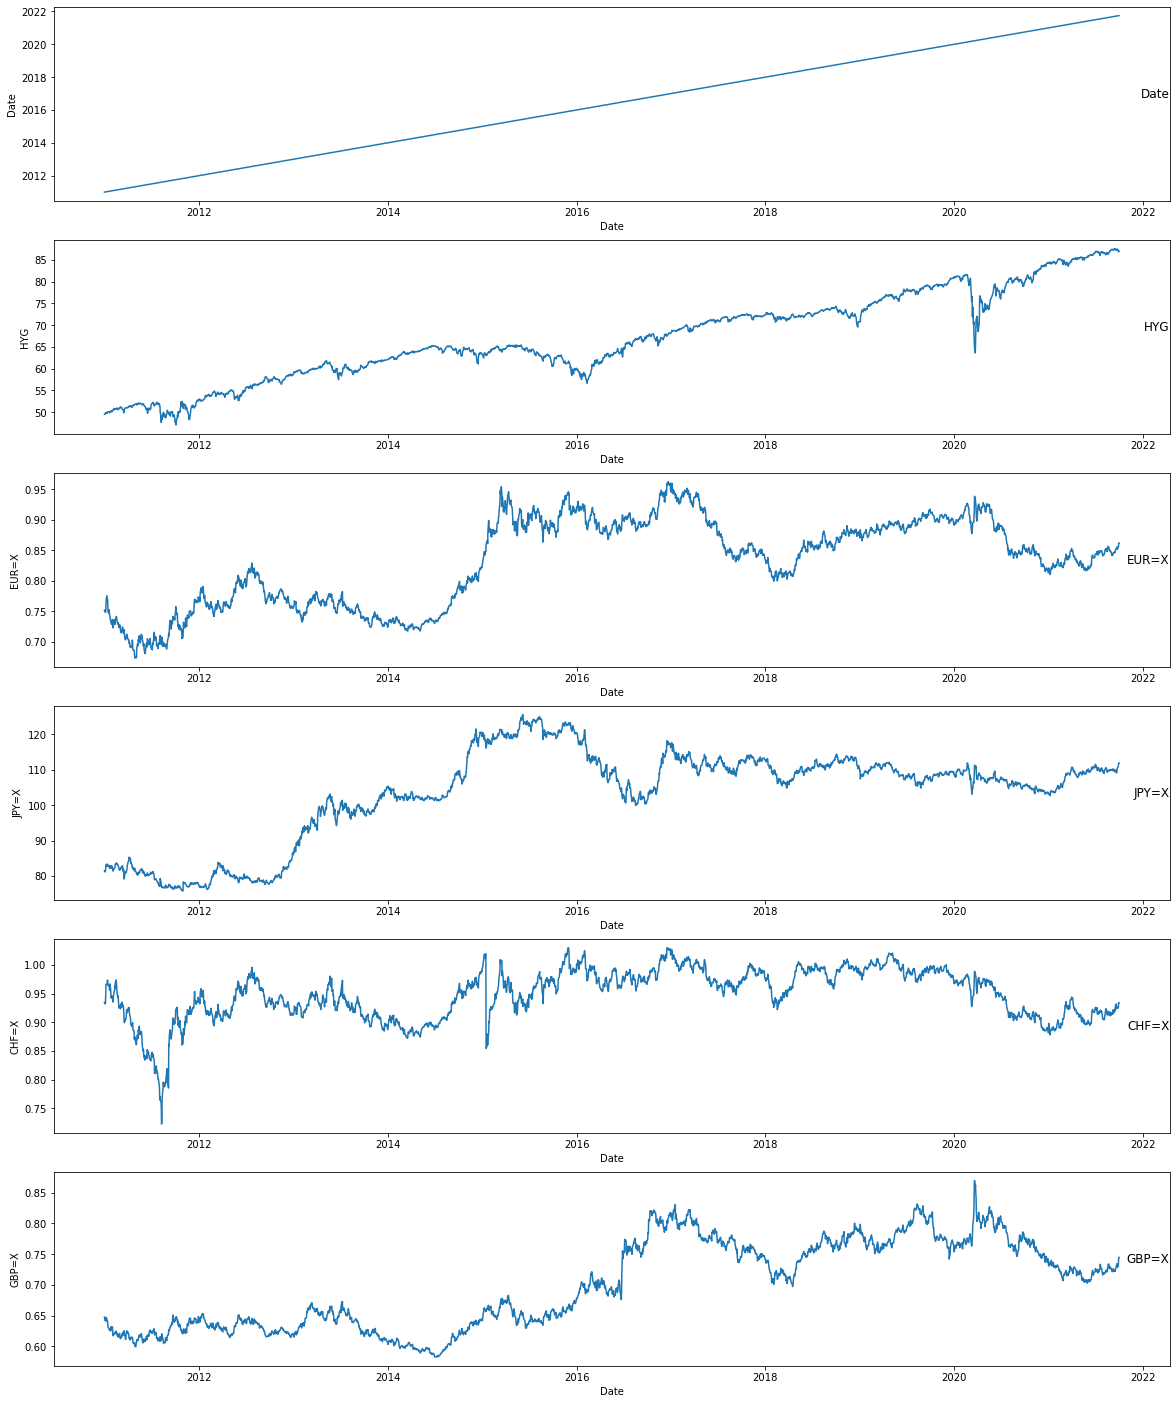

In [237]:
i = 1
# plot each column
plt.figure(figsize=(20,25))
for col in ac1.columns:
    plt.subplot(len(ac1.columns), 1, i)
    sns.lineplot(data=ac1, x='Date', y=col)
    plt.title(str(col), y=0.5, loc='right')
    i += 1
plt.show()

# Feature selection/reduction 


In [238]:
scaler= MinMaxScaler()
ac2=scaler.fit_transform(ac1.drop(columns='Date'))
ac2=pd.DataFrame(ac2)
ac2.index=ac1.index
ac2.columns=ac1.drop(columns='Date').columns
ac2.head()

Symbols,HYG,EUR=X,JPY=X,CHF=X,GBP=X
0,0.061122,0.270615,0.115056,0.688679,0.226512
1,0.062070,0.259567,0.107900,0.680546,0.206913
2,0.067621,0.259775,0.118864,0.687833,0.218853
3,0.070734,0.266736,0.126240,0.729993,0.203258
4,0.072224,0.299186,0.149312,0.790533,0.215616


In [239]:
scalerj=MinMaxScaler()
target=scalerj.fit_transform(pd.DataFrame(ac1['JPY=X']))

### PCA 

Steps:
1. Dimension indexing
2. Tabulating PCA components
3. Plotting explained variance ratio
4. Visualisation

In [240]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (25,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

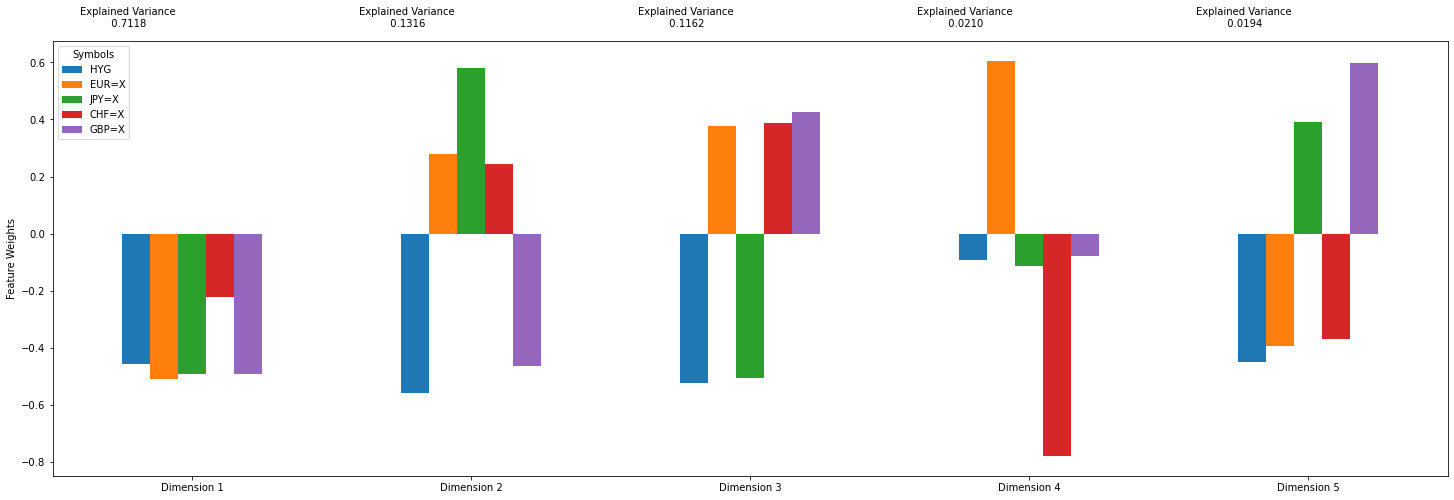

In [241]:
pca=PCA().fit(ac2)
pcasummary=pca_results(ac1.drop(columns='Date'), pca)

### Feature Reduction

In [242]:
varratio=pd.DataFrame(pca.explained_variance_ratio_)
varratio.index=pcasummary.index

In [243]:
i=0
a=[]
while i<len(varratio):
    a.append(varratio[0][0:i+1].sum())
    i=i+1
varratio['cumsum']=a
varratio

,0,cumsum
Dimension 1,0.711769,0.711769
Dimension 2,0.131647,0.843417
Dimension 3,0.116185,0.959602
Dimension 4,0.020955,0.980557
Dimension 5,0.019443,1.000000


In [244]:
ac3=pca.transform(ac2)
ac3=pd.DataFrame(ac3)
ac3.index=ac1.index
ac3.columns=pcasummary.index
ac3.head(5)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,0.654841,-0.015187,0.251338,-0.029524,0.037521
1,0.674993,-0.015838,0.238823,-0.027649,0.029922
2,0.659479,-0.016282,0.238355,-0.035872,0.036088
3,0.649162,0.005709,0.245283,-0.064394,0.009978
4,0.601058,0.036331,0.273712,-0.095572,-0.009342


### Conclusion: based on the explained variance ratio, the first 3 dimensions hold more than 95% of the variance


# Develop a model and forecast "JPY=X" 5 days in advance (+1, +2, +3, +4, +5).


In [245]:
#checking stationarity
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')
    print("Eigen values\n",res.eig,'\n')


In [246]:
def acfplot(df, row):
    plots_per_row = row

    number_of_plots = df.shape[-1]

    fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 
    axes = axes.flatten()
    i = 0
    for col in df.columns:    
        a = plot_acf(df[col], ax=axes[i], title='Autocorrelation of {}'.format(str(col)), lags=50)
        #plt.title(str(col), y=0.5, loc='right')
        i+=1
    
    for i in range(1,len(axes)-number_of_plots+1):
        fig.delaxes(axes[-i]) # remove empty subplot
    # plt.tight_layout()

    fig.set_figwidth(20)
    fig.set_figheight(10)

    plt.show()

In [247]:
def pacfplot(df, row):
    plots_per_row = row

    number_of_plots = df.shape[-1]

    fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 
    axes = axes.flatten()
    i = 0
    for col in df.columns:    
        a = plot_pacf(df[col], ax=axes[i], title='Partial Autocorrelation of {}'.format(str(col)),lags=50)
        #plt.title(str(col), y=0.5, loc='right')
        i+=1
    
    for i in range(1,len(axes)-number_of_plots+1):
        fig.delaxes(axes[-i]) # remove empty subplot
    # plt.tight_layout()

    fig.set_figwidth(20)
    fig.set_figheight(10)

    plt.show()

In [248]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1]+ df_res[str(col)].cumsum()
    return df_res

### checking for cointegration between components. Individual components need not be stationary if they are all cointegrated (a stationary linear relationship between components exist)

In [249]:
joh_output(coint_johansen(ac3.iloc[:,:3],0,1))

   max_eig_stat  trace_stat
0     11.782869   17.263450
1      4.676355    5.480580
2      0.804225    0.804225 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 

Eigen values
 [0.00376582 0.00149627 0.00025748] 



### Dimensions are not cointegrated. Hence, let's difference the data once and see

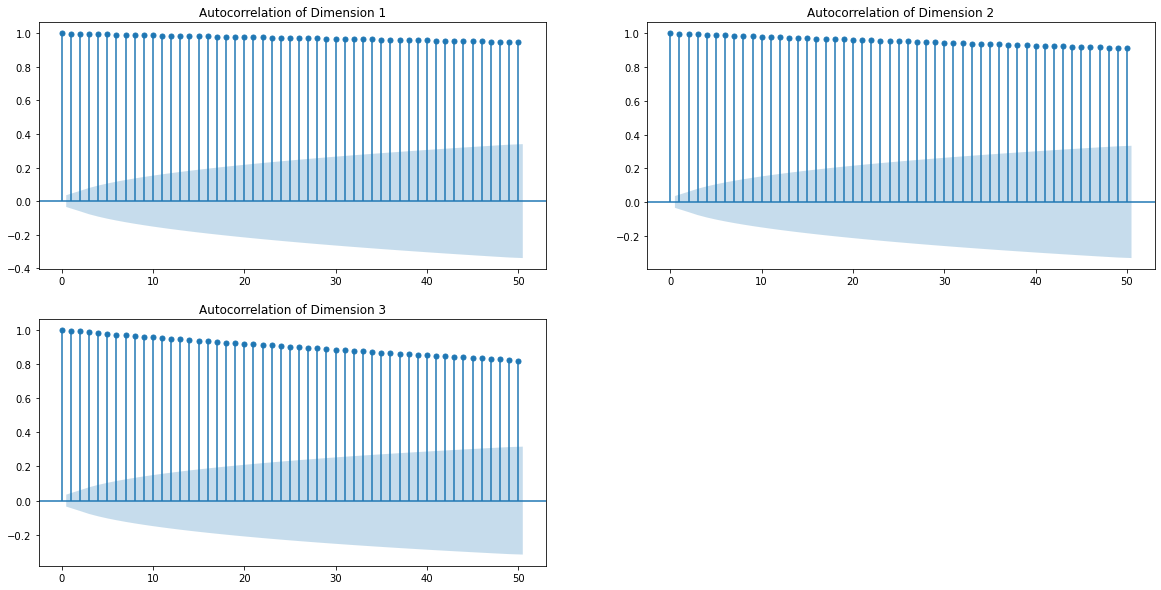

In [250]:
acfplot(ac3.iloc[:,:3],2)

### from acf plot, we can see that the 3 variables are not stationary on their own

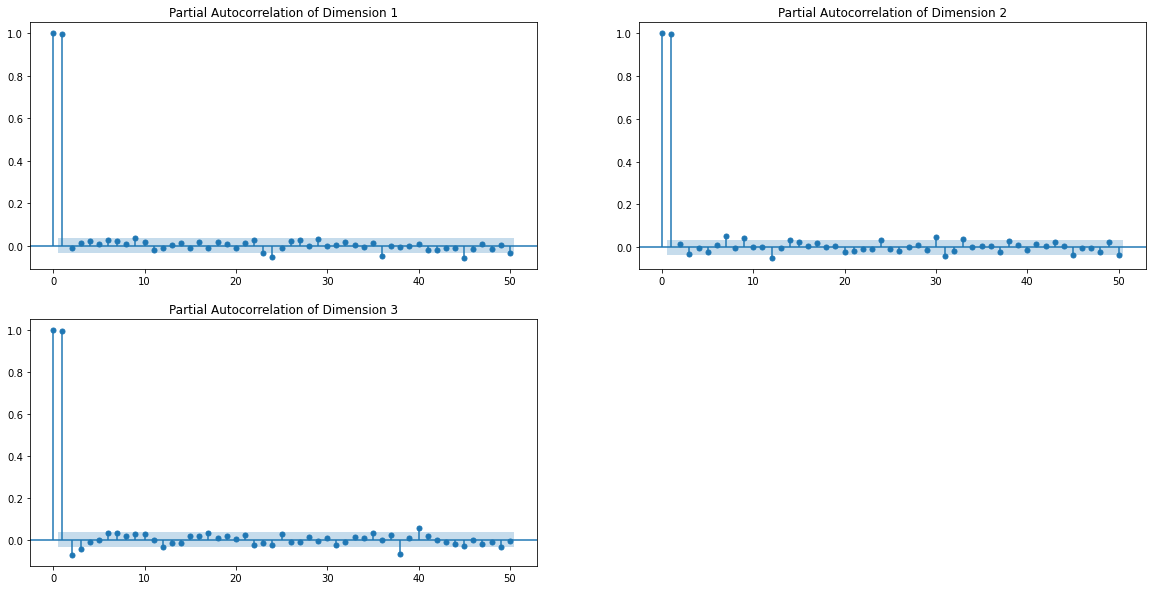

In [251]:
pacfplot(ac3.iloc[:,:3],2)

### difference the data with lag=1 once and see if the series are now stationary

In [252]:

ac4=ac3.iloc[:,:3].diff().dropna()
ac4.head(5)

,Dimension 1,Dimension 2,Dimension 3
1,0.020152,-0.000651,-0.012515
2,-0.015514,-0.000444,-0.000467
3,-0.010317,0.021991,0.006927
4,-0.048104,0.030622,0.028430
5,-0.021644,0.009904,0.018744


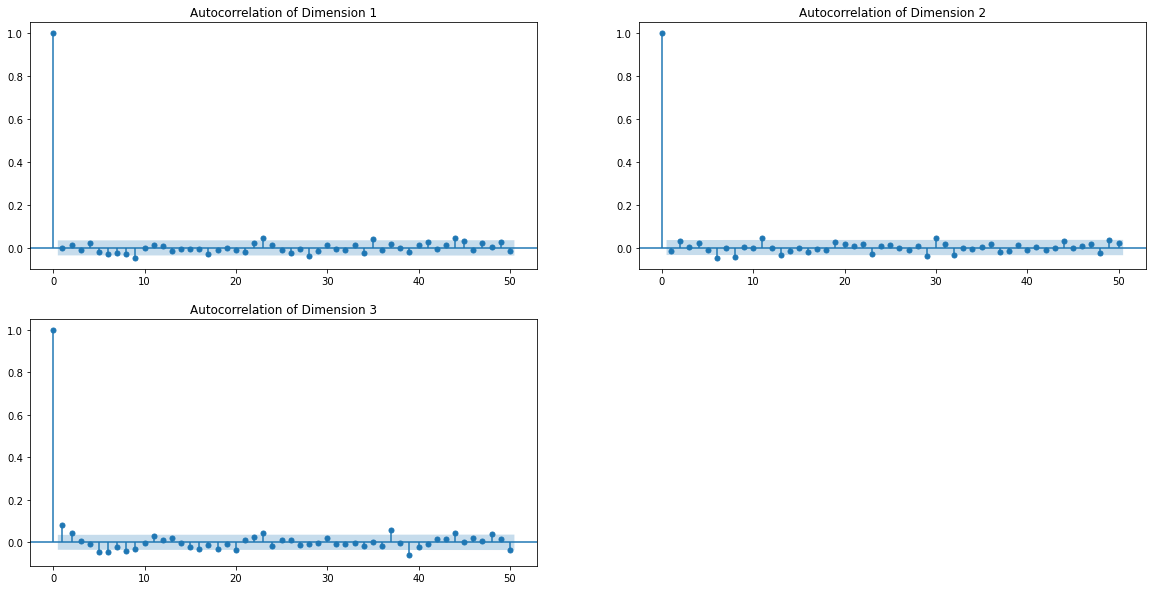

In [253]:
acfplot(ac4,2)

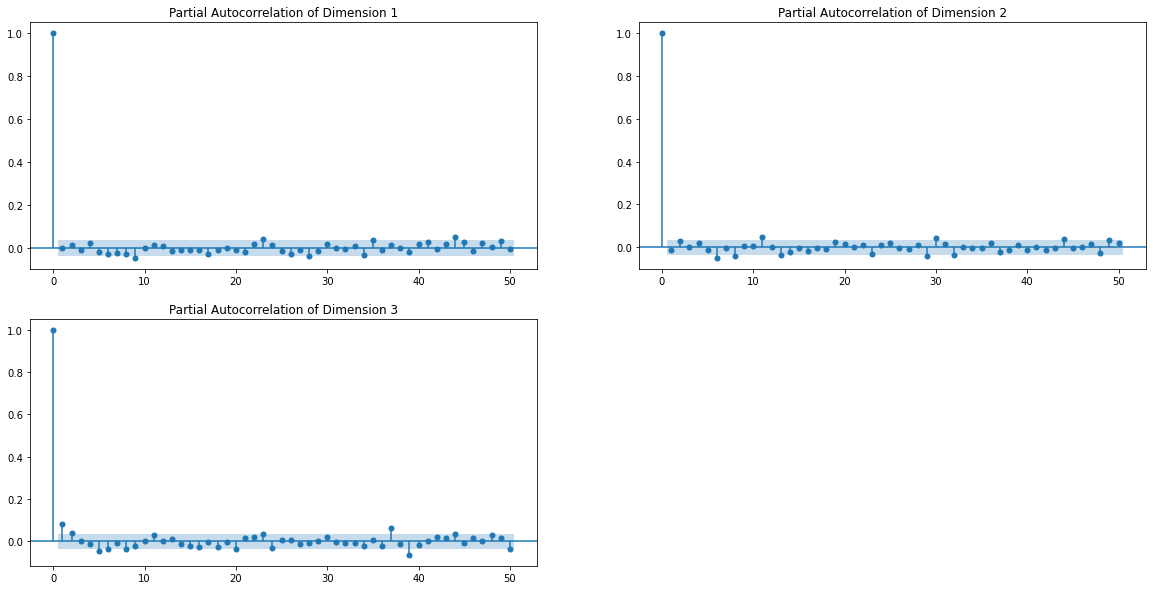

In [254]:
pacfplot(ac4,2)

### From the acf and pacf plots we can see that the series seems stationary now, individually. If all components are stationary, the multivariate time series can be deemed stable

### Further stationarity checking using Dicky Fuller and Johansen Test

In [255]:
from statsmodels.tsa.stattools import adfuller
#let's do Dicky Fuller test to check the stationarity. If p-value is <0.05, the component can be deemed stationary
for col in ac4.columns:
    result = adfuller(ac4[col])
    print(str(col))
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

Dimension 1
ADF Statistic: -20.688470
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Dimension 2
ADF Statistic: -16.084393
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Dimension 3
ADF Statistic: -21.428709
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [256]:
#let's check the multivariate time series again
joh_output(coint_johansen(ac4,0,1))

   max_eig_stat   trace_stat
0   1309.166946  3606.249535
1   1218.641992  2297.082588
2   1078.440597  1078.440597 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 

Eigen values
 [0.34251675 0.3231734  0.29208596] 



In [257]:
ac4.head()

,Dimension 1,Dimension 2,Dimension 3
1,0.020152,-0.000651,-0.012515
2,-0.015514,-0.000444,-0.000467
3,-0.010317,0.021991,0.006927
4,-0.048104,0.030622,0.028430
5,-0.021644,0.009904,0.018744


### since JPY=X is the target variable, let's bring back the scaled data of JPY=X

In [258]:
ac5=ac4.merge(pd.DataFrame(ac2['JPY=X'].diff().dropna()),left_index=True, right_index=True)
ac5

,Dimension 1,Dimension 2,Dimension 3,JPY=X
1,0.020152,-0.000651,-0.012515,-0.007156
2,-0.015514,-0.000444,-0.000467,0.010964
3,-0.010317,0.021991,0.006927,0.007376
4,-0.048104,0.030622,0.028430,0.023071
5,-0.021644,0.009904,0.018744,0.002225
...,...,...,...,...
3120,-0.005241,0.001384,0.001200,0.004390
3121,-0.002741,0.008421,-0.000187,0.004009
3122,-0.019711,0.001721,0.017613,0.011305
3123,-0.031413,0.002343,0.017795,0.008178


### Checking cointegration of the components to JPY=X

In [259]:
joh_output(coint_johansen(ac5,0,1))

   max_eig_stat   trace_stat
0   1318.007958  4742.141390
1   1274.419361  3424.133431
2   1212.323309  2149.714070
3    937.390762   937.390762 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 

Eigen values
 [0.344376   0.33515814 0.32180217 0.2593694 ] 



### Conclusion: As both the max eig and trace stat are now more than the critical values at 95%, the multivariate series can be deemed stable. we can now try to fit these data to a VARMA model and predict the future values

### Split train and test set

In [260]:
train, test= ac5.iloc[:int(0.8*len(ac5))],ac5.iloc[int(0.8*len(ac5)):]

### Trying auto-ARIMA (univariate) for each variable to find possible p,q,d values

In [261]:
#As we already differenced the components manually, d=0. 
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm
for col in ac5.columns:
    model = pm.auto_arima(train[col], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      #seasonal=True,   # No Seasonality
                      #start_P=0, 
                      #D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

    print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-13292.166, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-13296.165, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-13294.496, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-13294.491, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-13296.353, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.133 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2499
Model:                        SARIMAX   Log Likelihood                6649.176
Date:                Sun, 21 Nov 2021   AIC                         -13296.353
Time:                        21:45:34   BIC                         -13290.529
Sample:                             0   HQIC                        -13294.239
                               - 2499                             

### Since AutoARIMA seems to find local minima, trying manual grid search

In [262]:
pq=[(0,0,0),
    (1,0,0),
    (2,0,0),
    (1,0,1),
    (1,0,2),
    (2,0,2),
    (2,0,1),
    (0,0,1),
    (0,0,2)]

### UNIVARIATE MODEL

In [263]:
model = ARIMA(train['JPY=X'], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. 

                              ARMA Model Results                              
Dep. Variable:                  JPY=X   No. Observations:                 2499
Model:                     ARMA(1, 1)   Log Likelihood                7755.960
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 21 Nov 2021   AIC                         -15503.921
Time:                        21:45:42   BIC                         -15480.626
Sample:                             0   HQIC                        -15495.463
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.000      0.907      0.365      -0.000       0.001
ar.L1.JPY=X    -0.7318      0.341     -2.145      0.032      -1.400      -0.063
ma.L1.JPY=X     0.7204      0.347      2.076    

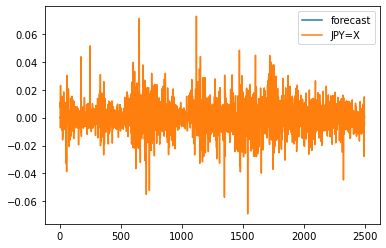

In [264]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [265]:
# values before differencing
ac3test=pd.merge(ac3.iloc[:,:3], ac2['JPY=X'], left_index=True, right_index=True)
ac3test.head()

,Dimension 1,Dimension 2,Dimension 3,JPY=X
0,0.654841,-0.015187,0.251338,0.115056
1,0.674993,-0.015838,0.238823,0.107900
2,0.659479,-0.016282,0.238355,0.118864
3,0.649162,0.005709,0.245283,0.126240
4,0.601058,0.036331,0.273712,0.149312


In [266]:
result=model_fit.forecast(steps=625)
result=pd.DataFrame(result[0]).rename(columns={0: 'JPY=X'})
result.index=test.index
result
inv_res = inverse_diff(pd.DataFrame(ac3test['JPY=X'].iloc[:int(0.8*len(ac5))]), pd.DataFrame(result))
inv_res['JPY=X_inv_scale'] = scalerj.inverse_transform(pd.DataFrame(inv_res['JPY=X_1st_inv_diff']))
inv_res.head()

,JPY=X,JPY=X_1st_inv_diff,JPY=X_inv_scale
2500,0.000109,0.609081,106.126427
2501,0.000259,0.609340,106.139364
2502,0.000149,0.609489,106.146804
2503,0.000230,0.609719,106.158267
2504,0.000171,0.609890,106.166786


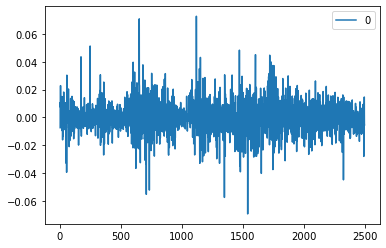

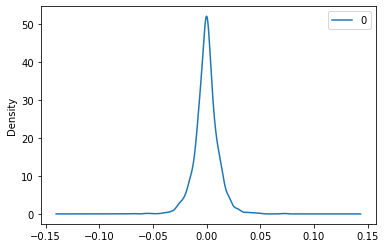

                  0
count  2.499000e+03
mean  -4.772824e-08
std    1.086331e-02
min   -6.918453e-02
25%   -5.419368e-03
50%    1.481320e-05
75%    5.328386e-03
max    7.259203e-02


In [267]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [268]:
set=pd.DataFrame(ac1['JPY=X'][:int(0.8*len(ac5))])
set.head()

,JPY=X
0,81.480003
1,81.123001
2,81.669998
3,82.038002
4,83.189003


In [269]:
pred=inv_res[['JPY=X_inv_scale']]
pred=pred.rename(columns={'JPY=X_inv_scale': 'JPY=X'})
pred.index=test.index

JPresuni=pd.concat([set,pred])
JPresuni.head()

,JPY=X
0,81.480003
1,81.123001
2,81.669998
3,82.038002
4,83.189003


<AxesSubplot:ylabel='JPY=X'>

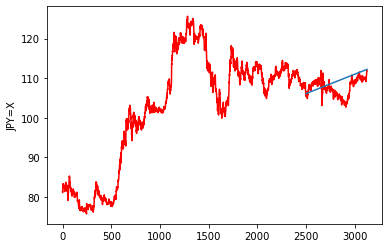

In [270]:
fig, ax = plt.subplots()
sns.lineplot(data=ac1['JPY=X'], ax=ax,color='red')
sns.lineplot(data=inv_res['JPY=X_inv_scale'], ax=ax)

Test RMSE: 2.943


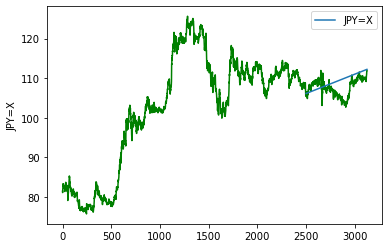

In [271]:
# evaluate forecasts
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(ac1['JPY=X'].iloc[int(0.8*len(ac1)):], pred))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
fig, ax = plt.subplots()
sns.lineplot(data=ac1['JPY=X'], ax=ax,color='green')
sns.lineplot(data=pred, ax=ax)

plt.show()

### Conclusion ARIMA: univariate ARIMA (1,0,1) seems to be reasonable

In [272]:
testact= ac3test.iloc[int(0.8*len(ac3test)):]
testact.head()

,Dimension 1,Dimension 2,Dimension 3,JPY=X
2500,-0.484345,-0.245814,0.142033,0.599090
2501,-0.485118,-0.255366,0.149754,0.594159
2502,-0.473718,-0.249959,0.142180,0.593678
2503,-0.501989,-0.233575,0.139318,0.618373
2504,-0.491075,-0.231518,0.156061,0.604863


### VARMAX (MULTIVARIATE)

In [273]:
from timeit import default_timer as timer
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn import metrics
df_results_moni = pd.DataFrame(columns=['p', 'q','Dim1RMSE','Dim2RMSE','Dim3RMSE','JPYRMSE'])
print('Grid Search Started')
start = timer()
for i in pq:
    if i[0]== 0 and i[2] ==0:
        pass
    else:
        print(f' Running for {i}')
        model = VARMAX(train, order=(i[0],i[2])).fit(disp=False)
        result = model.forecast(steps = 625)
        inv_res = inverse_diff(ac3test.iloc[:int(0.8*len(ac3test))], result)
        inv_res['JPY=X_1st_inv_diff'] = scalerj.inverse_transform(pd.DataFrame(inv_res['JPY=X_1st_inv_diff']))
        Dim1Rmse = np.sqrt(metrics.mean_squared_error(testact['Dimension 1'], inv_res['Dimension 1_1st_inv_diff']))
        Dim2Rmse = np.sqrt(metrics.mean_squared_error(testact['Dimension 2'], inv_res['Dimension 2_1st_inv_diff']))
        Dim3Rmse = np.sqrt(metrics.mean_squared_error(testact['Dimension 3'], inv_res['Dimension 3_1st_inv_diff']))
        #Dim4Rmse = np.sqrt(metrics.mean_squared_error(test['Dimension 4'], inv_res['Dimension 4_1st_inv_diff']))
        JPYRmse = np.sqrt(metrics.mean_squared_error(scalerj.inverse_transform(pd.DataFrame(testact['JPY=X'])), inv_res['JPY=X_1st_inv_diff']))
        df_results_moni = df_results_moni.append({'p': i[0], 'q': i[2], 'Dim1RMSE':Dim1Rmse,'Dim2RMSE':Dim2Rmse,'Dim3RMSE':Dim3Rmse,'JPYRMSE':JPYRmse}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Grid Search Started
 Running for (1, 0, 0)


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


 Running for (2, 0, 0)


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


 Running for (1, 0, 1)


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


 Running for (1, 0, 2)


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


 Running for (2, 0, 2)


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


 Running for (2, 0, 1)


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


 Running for (0, 0, 1)


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


 Running for (0, 0, 2)


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Total time taken to complete grid search in seconds: 142.3875108000011


C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [274]:
df_results_moni 

,p,q,Dim1RMSE,Dim2RMSE,Dim3RMSE,JPYRMSE
0,1.0,0.0,0.318778,0.078276,0.277762,2.862231
1,2.0,0.0,0.319646,0.077924,0.277856,2.866537
2,1.0,1.0,0.318793,0.078238,0.277785,2.863750
3,1.0,2.0,0.319430,0.078048,0.277888,2.860275
4,2.0,2.0,0.319644,0.077960,0.277807,2.863971
5,2.0,1.0,0.319665,0.077949,0.277811,2.864991
6,0.0,1.0,0.302965,0.086650,0.279138,2.337320
7,0.0,2.0,0.334217,0.075053,0.275800,3.436859


### p,q=0,1 has the lowest RMSE for JPY

In [275]:
model = VARMAX(train, order=(0,1)).fit(disp=False)
result = model.forecast(steps = 630)

C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Markus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [276]:
res = inverse_diff(ac3test.iloc[:int(0.8*len(ac3test))], result)
res['JPY=X_inv_scale'] = scalerj.inverse_transform(pd.DataFrame(res['JPY=X_1st_inv_diff']))
#res.index=test.index
res.head()

,Dimension 1,Dimension 2,Dimension 3,JPY=X,Dimension 1_1st_inv_diff,Dimension 2_1st_inv_diff,Dimension 3_1st_inv_diff,JPY=X_1st_inv_diff,JPY=X_inv_scale
2499,-0.000427,-0.000128,-0.000034,0.000150,-0.483695,-0.236017,0.134627,0.604171,105.881497
2500,-0.000412,-0.000139,-0.000049,0.000144,-0.484107,-0.236156,0.134578,0.604315,105.888690
2501,-0.000412,-0.000139,-0.000049,0.000144,-0.484518,-0.236295,0.134529,0.604460,105.895882
2502,-0.000412,-0.000139,-0.000049,0.000144,-0.484930,-0.236434,0.134480,0.604604,105.903075
2503,-0.000412,-0.000139,-0.000049,0.000144,-0.485341,-0.236573,0.134431,0.604748,105.910268


In [277]:
set=pd.DataFrame(ac1['JPY=X'][:int(0.8*len(ac3test))])
set.head()

,JPY=X
0,81.480003
1,81.123001
2,81.669998
3,82.038002
4,83.189003


In [278]:
pred=res[['JPY=X_inv_scale']]
pred=pred.rename(columns={'JPY=X_inv_scale': 'JPY=X'})
#pred.index=test.index
pred.head()

,JPY=X
2499,105.881497
2500,105.888690
2501,105.895882
2502,105.903075
2503,105.910268


In [279]:
JPres=pd.concat([set,pred])
JPres.head()

,JPY=X
0,81.480003
1,81.123001
2,81.669998
3,82.038002
4,83.189003


<AxesSubplot:ylabel='JPY=X'>

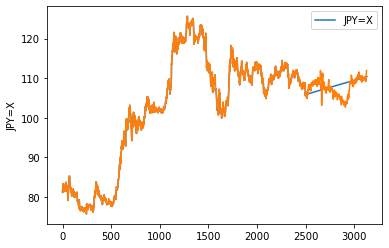

In [280]:
fig, ax = plt.subplots()
sns.lineplot(data=JPres, ax=ax)
sns.lineplot(data=ac1['JPY=X'], ax=ax)

<AxesSubplot:ylabel='JPY=X'>

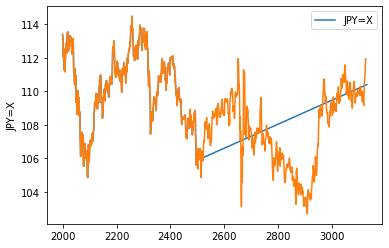

In [281]:
fig, ax = plt.subplots()
sns.lineplot(data=JPres[2000:], ax=ax)
sns.lineplot(data=ac1['JPY=X'][2000:], ax=ax)

In [282]:
rmse = sqrt(mean_squared_error(ac1['JPY=X'].iloc[-630:], pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.336


### Conclusion: MULTIVARIATE VARMAX(p,q,d)(0,1,1) slightly improved the RMSE

## FORECAST MULTIVARIATE VARMAX

In [283]:
#The predicted forecast of 'JPY=X' in the next 5 days are as follow
pred5=JPres.iloc[-5:]
pred5

,JPY=X
3124,110.376990
3125,110.384183
3126,110.391376
3127,110.398569
3128,110.405761


### Export to csv

In [284]:
pred5.to_csv(path_or_buf='D:/Mini Project/Market Prediction/VARMAresult.csv')

# Using Keras on TensorFlow build a Long Short Term Memory (LSTM) and forecast "JPY=X" 5 days in advance (+1, +2, +3, +4, +5). 


In [285]:
ac3.head(5)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,0.654841,-0.015187,0.251338,-0.029524,0.037521
1,0.674993,-0.015838,0.238823,-0.027649,0.029922
2,0.659479,-0.016282,0.238355,-0.035872,0.036088
3,0.649162,0.005709,0.245283,-0.064394,0.009978
4,0.601058,0.036331,0.273712,-0.095572,-0.009342


In [286]:
ac5=ac4.merge(pd.DataFrame(ac2['JPY=X'].diff().dropna()),left_index=True, right_index=True)
ac5

,Dimension 1,Dimension 2,Dimension 3,JPY=X
1,0.020152,-0.000651,-0.012515,-0.007156
2,-0.015514,-0.000444,-0.000467,0.010964
3,-0.010317,0.021991,0.006927,0.007376
4,-0.048104,0.030622,0.028430,0.023071
5,-0.021644,0.009904,0.018744,0.002225
...,...,...,...,...
3120,-0.005241,0.001384,0.001200,0.004390
3121,-0.002741,0.008421,-0.000187,0.004009
3122,-0.019711,0.001721,0.017613,0.011305
3123,-0.031413,0.002343,0.017795,0.008178


In [287]:
ac5.head(5)

,Dimension 1,Dimension 2,Dimension 3,JPY=X
1,0.020152,-0.000651,-0.012515,-0.007156
2,-0.015514,-0.000444,-0.000467,0.010964
3,-0.010317,0.021991,0.006927,0.007376
4,-0.048104,0.030622,0.028430,0.023071
5,-0.021644,0.009904,0.018744,0.002225


In [288]:
ac3test.head(5)

,Dimension 1,Dimension 2,Dimension 3,JPY=X
0,0.654841,-0.015187,0.251338,0.115056
1,0.674993,-0.015838,0.238823,0.107900
2,0.659479,-0.016282,0.238355,0.118864
3,0.649162,0.005709,0.245283,0.126240
4,0.601058,0.036331,0.273712,0.149312


In [289]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [],[]
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

### Model Building with manual grid search 

Hyper parameters used for tuning: a) number of input(n_in) 

found n_in=17 to give lower rmse value after trial and error

Steps (summarized):
1. Rearrange dataframe
2. split train and test set
3. scaling data
4. model building
5. plot loss
6. predict
7. inverse transform values
8. find best model based on rmse


### SGD Optimizer

test for n_in 17
(2486, 1, 68) (2486, 4) (622, 1, 68) (622, 4)


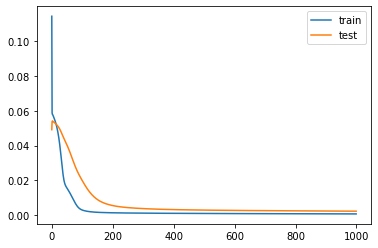

Test RMSE: 1.059 Train RMSE: 1.706


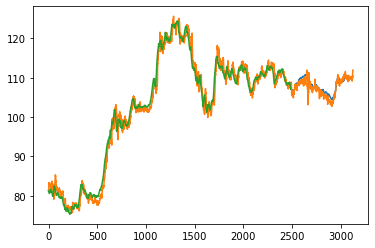

   n_in  n_out      rmse  rmse_train
0    17      1  1.059232     1.70607


<AxesSubplot:ylabel='JPY=X_inv_scale'>

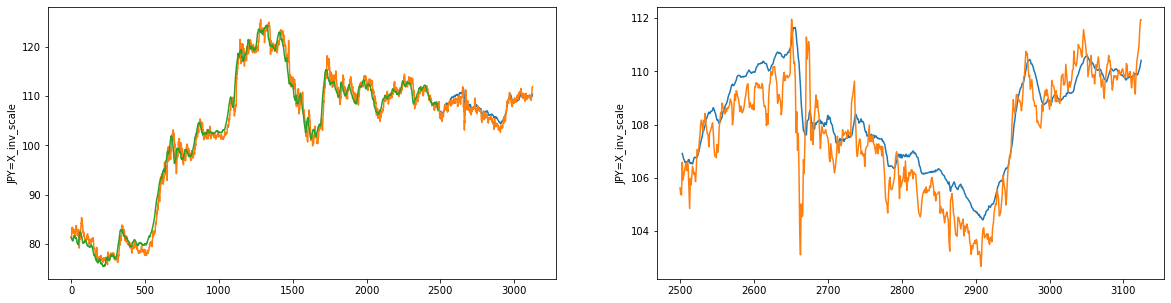

In [361]:
test_df2=[]
best_rmse2 = 1000000000
best_yhat2 = None
best_model2 = None
for i in range(17,19,2):
    print('test for n_in {}'.format(str(i)))
    n_in=i
    n_out=1
    # step 1. Rearrange dataframe
    reframed=series_to_supervised(ac3test, n_in=n_in, n_out=n_out, dropnan=True)

    # step 2. split into train and test sets
    values = reframed.values
    train = values[:int(0.8*len(reframed)), :]
    test = values[int(0.8*len(reframed)):, :]

    # step 3. scale the data
    scaler1=MinMaxScaler()
    scaler2=MinMaxScaler()
    # split into input and outputs
    train_X, train_y = train[:, :n_in*ac3test.shape[1]], train[:,-ac3test.shape[1]:]
    test_X, test_y = test[:, :n_in*ac3test.shape[1]], test[:,-ac3test.shape[1]:]
    train_X=scaler1.fit_transform(train_X)
    test_X=scaler1.transform(test_X)
    train_y=scaler2.fit_transform(train_y)
    test_y=scaler2.transform(test_y)
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    #train_y = train_y.reshape((train_y.shape[0], 1, train_y.shape[1]))
    #test_y = test_y.reshape((test_y.shape[0], 1, test_y.shape[1]))
    #print(train_y)
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # step 4. model building
    model = Sequential()
    model.add(LSTM(150, activation= 'relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(LSTM(100, activation= 'relu', return_sequences=False))
    #model.add(LSTM(50, return_sequences=False))
    model.add(Dense(50))
    #model.add(Dense(50))
    model.add(Dense(train_y.shape[1]))
    model.compile(loss='mse', optimizer='SGD')
    # fit network
    history = model.fit(train_X, train_y, epochs=1000, batch_size=20, validation_data=(test_X, test_y), verbose=0, shuffle=False)
    
    # step 5. plot loss
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    #step 6. predict
    yhat_train = model.predict([train_X])
    yhat = model.predict([test_X])
    
    #step 7. invert scaling for forecast
    inv_yhat = scaler2.inverse_transform(yhat)
    inv_yhat = inv_yhat[:,-1]
    #print(yhat)
    #print(test_y)
    inv_y = scaler2.inverse_transform(test_y)
    inv_y = inv_y[:,-1]
    #print(pd.DataFrame(inv_yhat))
    #inv2_yhat = inverse_diff(pd.DataFrame(ac3test['JPY=X'].iloc[:int(0.8*len(ac3test))]), pd.DataFrame(inv_yhat).rename(columns={0: 'JPY=X'}))
    inv2_yhat = scalerj.inverse_transform(pd.DataFrame(inv_yhat))
    inv2_yhat = pd.DataFrame(inv2_yhat).rename(columns={0: 'JPY=X_inv_scale'})
    #print(inv2_yhat)
    #inv2_yhat['JPY=X_inv_scale'] = scalerj.inverse_transform(pd.DataFrame(inv_yhat['JPY=X_1st_inv_diff']))
    inv2_yhat.index=list(range(len(ac3test)-len(test_y),len(ac3test)))
    
    #step 7.1. invert scaling for train
    inv_yhat_train = scaler2.inverse_transform(yhat_train)
    inv_yhat_train = inv_yhat_train[:,-1]
    #print(yhat)
    #print(test_y)
    inv_y_train = scaler2.inverse_transform(train_y)
    inv_y_train = inv_y_train[:,-1]
    #print(inv_yhat_train)
    #inv2_yhat_train = inverse_diff(pd.DataFrame(ac3test['JPY=X'].iloc[0:1]), pd.DataFrame(inv_yhat_train).rename(columns={0: 'JPY=X'}))
    inv2_yhat_train = scalerj.inverse_transform(pd.DataFrame(inv_yhat_train))
    inv2_yhat_train = pd.DataFrame(inv2_yhat_train).rename(columns={0: 'JPY=X_inv_scale'})
    #inv2_yhat_train['JPY=X_inv_scale'] = scalerj.inverse_transform(pd.DataFrame(inv_yhat_train['JPY=X_1st_inv_diff']))
    inv2_yhat_train.index=list(range(0,len(train_y)))
       
    #step 8. find best model based on rmse
    rmse= sqrt(mean_squared_error(ac1['JPY=X'].iloc[len(ac3test)-len(test_y):len(ac3test)], inv2_yhat['JPY=X_inv_scale']))
    rmse_train= sqrt(mean_squared_error(ac1['JPY=X'].iloc[:len(train_y)], inv2_yhat_train['JPY=X_inv_scale']))
    print('Test RMSE: %.3f' % rmse,'Train RMSE: %.3f' % rmse_train)
    test_df2.append([n_in,n_out,rmse, rmse_train])
     
    #step 9
    plt.plot(inv2_yhat['JPY=X_inv_scale'])
    plt.plot(ac1['JPY=X'])
    plt.plot(inv2_yhat_train['JPY=X_inv_scale'])
    plt.show()
    
    if rmse < best_rmse2:
        best_n_in = n_in
        best_rmse2 = rmse 
        best_yhat2 = inv2_yhat
        best_yhat2_train = inv2_yhat_train
        best_model2 = model 
        best_scaler12 = scaler1
        best_scaler22 = scaler2
        
test_df2 = pd.DataFrame(test_df2,columns=["n_in","n_out",'rmse','rmse_train'])
print(test_df2)

fig, (ax1,ax2) = plt.subplots(1, 2,figsize = (20,5))
sns.lineplot(data=best_yhat2['JPY=X_inv_scale'], ax=ax1)
sns.lineplot(data=ac1['JPY=X'], ax=ax1)
sns.lineplot(data=best_yhat2_train['JPY=X_inv_scale'], ax=ax1)

sns.lineplot(data=best_yhat2['JPY=X_inv_scale'], ax=ax2)
sns.lineplot(data=ac1['JPY=X'][2500:], ax=ax2)
sns.lineplot(data=best_yhat2_train['JPY=X_inv_scale'][2500:], ax=ax2)

In [362]:
best_rmse2

1.0592322587794316

In [363]:
best_n_in=test_df2[test_df2['rmse']==best_rmse2]['n_in'].values[0]
best_n_in

17

In [409]:
train_X, train_y = train[:, :n_in*ac3test.shape[1]], train[:,-ac3test.shape[1]:]
train_y.shape

(2486, 4)

# Conclusion: SGD Optimizer at n_in =17 seems to perform better based on RMSE

<AxesSubplot:ylabel='JPY=X_inv_scale'>

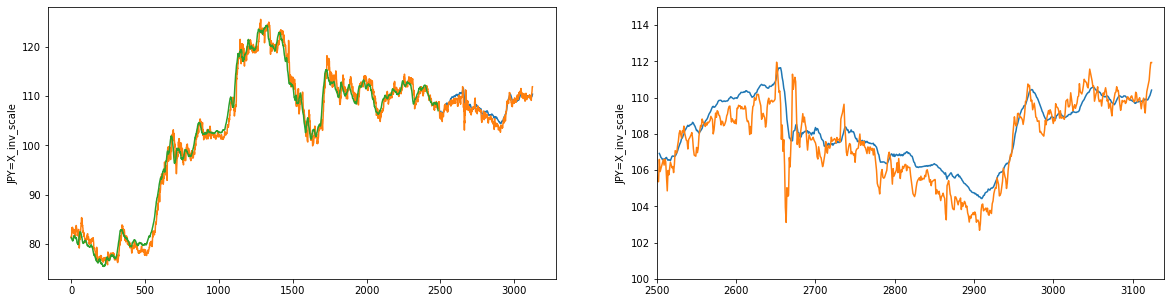

In [437]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize = (20,5))
sns.lineplot(data=best_yhat2['JPY=X_inv_scale'], ax=ax1)
sns.lineplot(data=ac1['JPY=X'], ax=ax1)
sns.lineplot(data=best_yhat2_train['JPY=X_inv_scale'], ax=ax1)

sns.lineplot(data=best_yhat2['JPY=X_inv_scale'], ax=ax2).set(xlim=(2500,3140),ylim=(100,115))
sns.lineplot(data=ac1['JPY=X'], ax=ax2)
#sns.lineplot(data=best_yhat2_train['JPY=X_inv_scale'][2500:], ax=ax2)

## LSTM 5 days Forecast



In [438]:
def predict_func(num_prediction, model):
    prediction_list = scaler2.transform(ac3test[-best_n_in:].to_numpy().reshape(int(best_n_in),4)).reshape(int(best_n_in),1,4)
    #x = prediction_list[-best_n_in:]
    #x = x.reshape((1,1,best_n_in*ac5.shape[1]))
    #print(prediction_list,prediction_list.shape)
    i=1
    for _ in range(num_prediction):
        x = prediction_list[:,:,-best_n_in*ac3test.shape[1]:]
        #print(x, x.shape)
        x = x.reshape((1,1,best_n_in*ac3test.shape[1]))
        #print(x,x.shape)
        out = model.predict(x).reshape(1,4)
        #print(out, out.shape)
        prediction_list = np.append(prediction_list, out).reshape(1,1,(best_n_in+i)*ac3test.shape[1])
        #print(prediction_list,prediction_list.shape)
        i=i+1
        
        
    #prediction_list = prediction_list[-num_prediction:]
    forecast = prediction_list[:,:,-num_prediction*ac3test.shape[1]+3::ac3test.shape[1]]   
    return prediction_list, forecast

In [439]:
pred_list, forecast=predict_func(5,best_model2)

In [427]:
inv_yhat = scaler2.inverse_transform(pred_list.reshape(best_n_in+5,4))
print(inv_yhat)
inv_yhat = inv_yhat[best_n_in:,3]
print(inv_yhat)
#inv2_yhat = inverse_diff(pd.DataFrame(ac3test['JPY=X']), pd.DataFrame(inv_yhat).rename(columns={0: 'JPY=X'}))
#print(inv2_yhat)
inv2_yhat = pd.DataFrame(scalerj.inverse_transform(pd.DataFrame(inv_yhat))).rename(columns={0:'JPY=X_inv_scale'})
print(inv2_yhat)
inv2_yhat.index=range(len(ac3test),len(ac3test)+5)
inv2_yhat

[[-0.33430868 -0.24740365 -0.31082967  0.68502081]
 [-0.33934947 -0.24515721 -0.30797871  0.68660437]
 [-0.33817839 -0.25120331 -0.30428123  0.6810921 ]
 [-0.33069711 -0.25495826 -0.30740104  0.67435718]
 [-0.35031954 -0.24554719 -0.29165848  0.68069113]
 [-0.35756373 -0.24216381 -0.2842812   0.68341721]
 [-0.36430527 -0.23816519 -0.27632776  0.6861433 ]
 [-0.36021047 -0.25150231 -0.26916839  0.67543945]
 [-0.35744171 -0.26014522 -0.27230887  0.66966675]
 [-0.3761384  -0.25331017 -0.2710919   0.68315662]
 [-0.36385489 -0.24401736 -0.29231476  0.69325901]
 [-0.36809053 -0.24140275 -0.28996274  0.69764879]
 [-0.37333165 -0.24001883 -0.28876323  0.70203857]
 [-0.37607292 -0.23159759 -0.28894974  0.70604741]
 [-0.39578371 -0.22987681 -0.27133644  0.71735256]
 [-0.42719679 -0.2275337  -0.25354102  0.72553066]
 [-0.42607961 -0.22616629 -0.25226048  0.72553066]
 [-0.24638539 -0.19462229 -0.21785198  0.70437908]
 [-0.2471305  -0.19076922 -0.21471184  0.70494604]
 [-0.24839505 -0.18707178 -0.20

,JPY=X_inv_scale
3125,110.880766
3126,110.909051
3127,110.898468
3128,110.849037
3129,110.877994


<AxesSubplot:ylabel='JPY=X_inv_scale'>

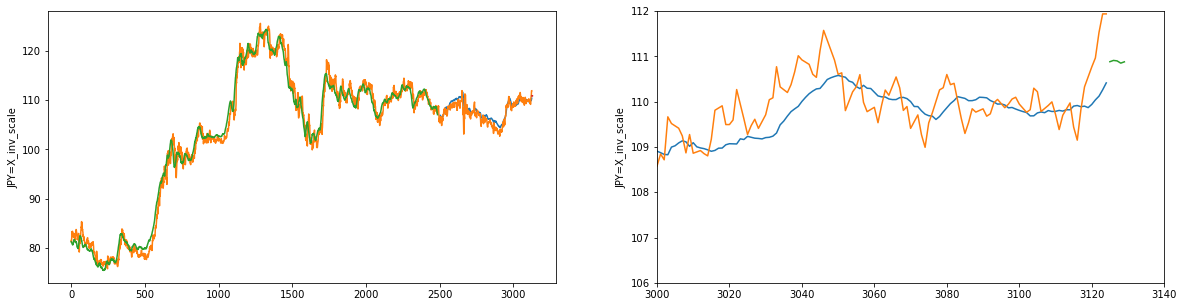

In [433]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize = (20,5))
sns.lineplot(data=best_yhat2['JPY=X_inv_scale'], ax=ax1)
sns.lineplot(data=ac1['JPY=X'], ax=ax1)
sns.lineplot(data=best_yhat2_train['JPY=X_inv_scale'], ax=ax1)
sns.lineplot(data=inv2_yhat['JPY=X_inv_scale'], ax=ax1)


sns.lineplot(data=best_yhat2['JPY=X_inv_scale'], ax=ax2).set(xlim=(3000,3140),ylim=(106,112))
sns.lineplot(data=ac1['JPY=X'][3000:], ax=ax2)
sns.lineplot(data=inv2_yhat['JPY=X_inv_scale'], ax=ax2)


### EXPORT RESULTS TO CSV

In [429]:
inv2_yhat[['JPY=X_inv_scale']].to_csv(path_or_buf='D:/Mini Project/Market Prediction/LSTMresult.csv')

In [430]:
pred5.to_csv(path_or_buf='D:/Mini Project/Market Prediction/VARMAresult.csv')